In [2]:
import sys
sys.path.insert(0, './utils/')
import feature_selection as fs
import classification_models as cm

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [3]:
import pickle
import pandas as pd

In [4]:
import importlib
importlib.reload(cm)
importlib.reload(fs)

<module 'feature_selection' from 'E:\\github\\lending_club\\lending_club_loans_default_prediction\\./utils\\feature_selection.py'>

In [5]:
importlib.reload(cm)

<module 'classification_models' from 'E:\\github\\lending_club\\lending_club_loans_default_prediction\\./utils\\classification_models.py'>

In [6]:
processed_data_filename = 'processed_data_20230511_225808.pickle'
processed_data_path = f'./data/{processed_data_filename}'

df = pd.read_pickle(processed_data_path)

In [7]:
df.shape

(876170, 115)

In [8]:
df.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,verification_status_Verified,verification_status_nan,pymnt_plan_y,pymnt_plan_nan,next_pymnt_d_Jan-2016,next_pymnt_d_Mar-2016,next_pymnt_d_nan,initial_list_status_w,initial_list_status_nan,label
0,-1.203909,-0.616915,-1.301341,1.217976,-0.453552,0.381301,-0.093288,-0.013627,-1.400648,-0.424777,...,1.430559,0.0,-0.003378,0.0,-0.296551,-0.00881,1.569560,-0.965898,0.0,0
1,-1.377846,0.516883,-1.241445,-1.641569,-0.453552,2.633161,-0.093288,-0.013627,-1.400648,-0.424777,...,-0.699027,0.0,-0.003378,0.0,-0.296551,-0.00881,1.569560,-0.965898,0.0,1
2,-1.377846,0.686216,-1.301341,-1.194287,-0.453552,1.507231,-0.093288,-0.013627,-1.400648,-0.424777,...,-0.699027,0.0,-0.003378,0.0,-0.296551,-0.00881,1.569560,-0.965898,0.0,0
3,-0.582706,0.080052,-0.666436,0.243131,-0.453552,0.381301,0.191932,-0.013627,-0.300568,-0.424777,...,-0.699027,0.0,-0.003378,0.0,-0.296551,-0.00881,1.569560,-0.965898,0.0,0
4,-1.377846,-0.116277,0.255973,-0.019376,-0.453552,-0.744628,0.405847,-0.013627,0.799513,-0.424777,...,-0.699027,0.0,-0.003378,0.0,-0.296551,-0.00881,-0.637121,-0.965898,0.0,0


In [9]:
df.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec',
       ...
       'verification_status_Verified', 'verification_status_nan',
       'pymnt_plan_y', 'pymnt_plan_nan', 'next_pymnt_d_Jan-2016',
       'next_pymnt_d_Mar-2016', 'next_pymnt_d_nan', 'initial_list_status_w',
       'initial_list_status_nan', 'label'],
      dtype='object', length=115)

In [10]:
# Perform feature selection

top_n_features = fs.select_features(X = df.drop(columns = ['label']), 
                   y = df['label'], 
                   ml_type = 'classification',
                   n_features_to_select = 30,                 
                   n_samples = 1000)

INFO:root:Starting feature selection...
INFO:root:Feature selection completed in 4.37 seconds


In [11]:
top_n_features 

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_less_than_1_year',
 'emp_length_nan',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_medical',
 'purpose_renewable_energy',
 'purpose_vacation',
 'sub_grade_A4',
 'sub_grade_A5',
 'sub_grade_B1',
 'sub_grade_B2',
 'sub_grade_B3',
 'sub_grade_B4',
 'sub_grade_B5',
 's

In [12]:
df.shape

(876170, 115)

In [13]:
# Randomly sample n_samples from your DataFrame
n_samples = 1000

df_sampled = df.sample(n_samples, random_state=42)

In [14]:
X_processed_sampled = df_sampled[top_n_features]
y_sampled = df_sampled['label']

C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression: Done (Execution Time: 4.94 seconds)
KNN: Done (Execution Time: 0.77 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


SVM: Done (Execution Time: 9.37 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest: Done (Execution Time: 4.77 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost: Done (Execution Time: 6.73 seconds)


C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\xzhou\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\xzhou\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


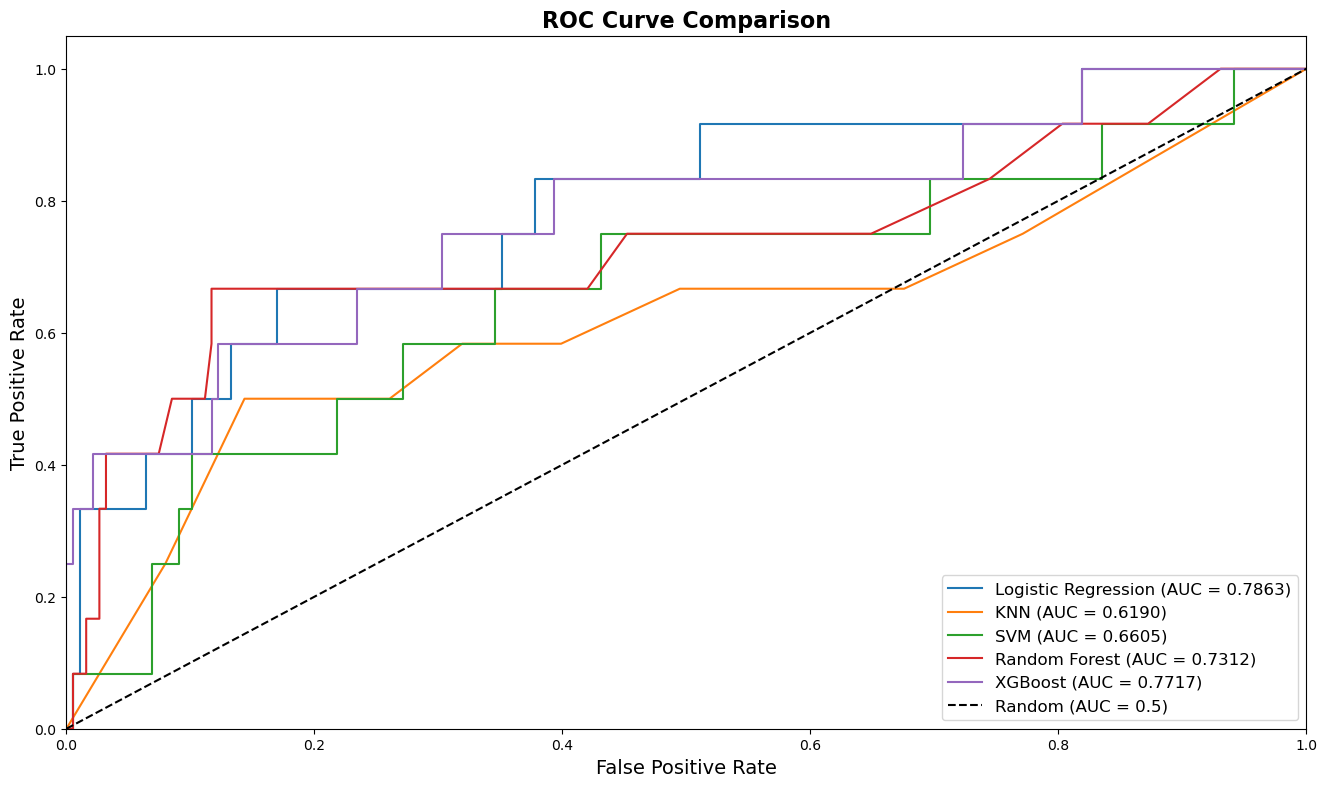

Model Performance Metrics:

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression     0.880   0.227273  0.416667  0.294118  0.786348
1                  KNN     0.600   0.085366  0.583333  0.148936  0.619016
2                  SVM     0.940   0.500000  0.083333  0.142857  0.660461
3        Random Forest     0.930   0.250000  0.083333  0.125000  0.731161
4              XGBoost     0.945   0.571429  0.333333  0.421053  0.771720

Best Performing Model:

Model        Logistic Regression
Accuracy                    0.88
Precision               0.227273
Recall                  0.416667
F1 Score                0.294118
ROC AUC                 0.786348
Name: 0, dtype: object

Best Hyperparameters for the Best Performing Model:

{'max_iter': 1000, 'C': 10}

Best Performing Model:

Model        Logistic Regression
Accuracy                    0.88
Precision               0.227273
Recall                  0.416667
F1 Score                0.294118
ROC AUC   

In [16]:
best_model = cm.run_classification_models(X_processed_sampled, y_sampled, search_type='random', scoring_metric='roc auc')

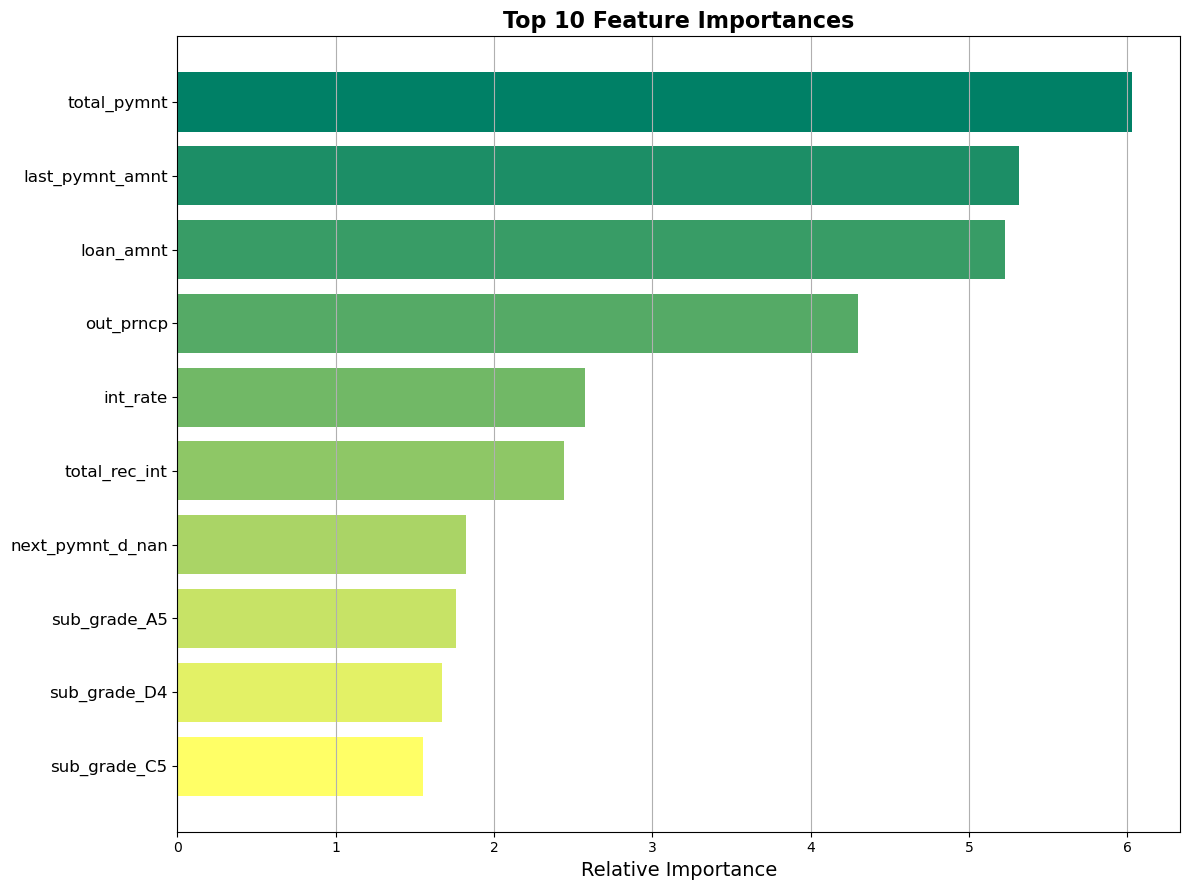

In [17]:
cm.plot_top_n_features(best_model, X_processed_sampled, n=10)